# Evaluation Example

This notebook shows an example of evaluation of **Heat Stress** indices for ERA5–CORDEX simulations with respect to ERA5-Land counterparts. For clarity and computational efficiency, the analysis is restricted to a **three-year period (2018–2020)** and only **August**, using a single model realization as an example.


First, we load the required packages to run the notebook:

In [ ]:
options(java.parameters = "-Xmx8g")

library(loadeR)
library(transformeR)
library(visualizeR)
library(convertR)
library(gridExtra)
library(RColorBrewer)


Loading required package: rJava

Loading required package: loadeR.java

Java version 23x amd64 by N/A detected

The maximum JVM heap space available is: 8.00 GB

NetCDF Java Library Version: 4.6.0-SNAPSHOT (Built-On: 20150423.1338) loaded and ready

You can manually set the NetCDF Java Library version before loading the package:
options(loadeR.java_forced_version = "X.Y.Z")
library(loadeR.java)

netCDF-Java CLASSPATH from bundled java package directory: /home/ana/micromamba/envs/R4.3/lib/R/library/loadeR.java/java:/home/ana/micromamba/envs/R4.3/lib/R/library/loadeR.java/java/netcdfAll-4.6.0-SNAPSHOT.jar

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.4 (2025-08-07) is loaded

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.

Loading required package: udunits2

udunits system database read from /home/ana/micromamba/envs/R4.3/lib/R/library/udunits2/share/udunits2.xml

convertR version 0.2.1 (2023-06-22) is loaded

  More information about the 'climate4R' ecosystem in: http://meteo.unican.es/climate4R


Attaching package: ‘convertR’


The following objects are masked from ‘package:loadeR’:

    hurs2huss, huss2hurs, tdps2hurs




## ERA5-Land <a class="anchor" id="era5-land"></a>

Here we use the `loadGridData` function from the `loadeR` package to retrieve data for a heat stress index, already calculated in the notebook `2_era5land.ipynb`. See that notebook for more details. The heat stress index was calculated on the original hourly resolution. 

In [ ]:
era5_wbgt_file <- "/mnt/CORDEX_CMIP6_tmp/user_tmp/acasanueva/tests/wbgt_era5-land_2018-2020.nc4"

In [3]:
era5_wbgt <- loadGridData(era5_wbgt_file, var = "swbgt")

[2026-01-26 11:31:04.233148] Defining geo-location parameters

[2026-01-26 11:31:04.288064] Defining time selection parameters

[2026-01-26 11:31:04.358666] Retrieving data subset ...

[2026-01-26 11:32:07.479365] Done



`climatology` is used to perform a temporal average of the hourly values, which is then plotted with `spatialPlot`:

In [4]:
era5_clim <- climatology(era5_wbgt)


[2026-01-26 11:32:10.228944] - Computing climatology...

[2026-01-26 11:32:16.955594] - Done.



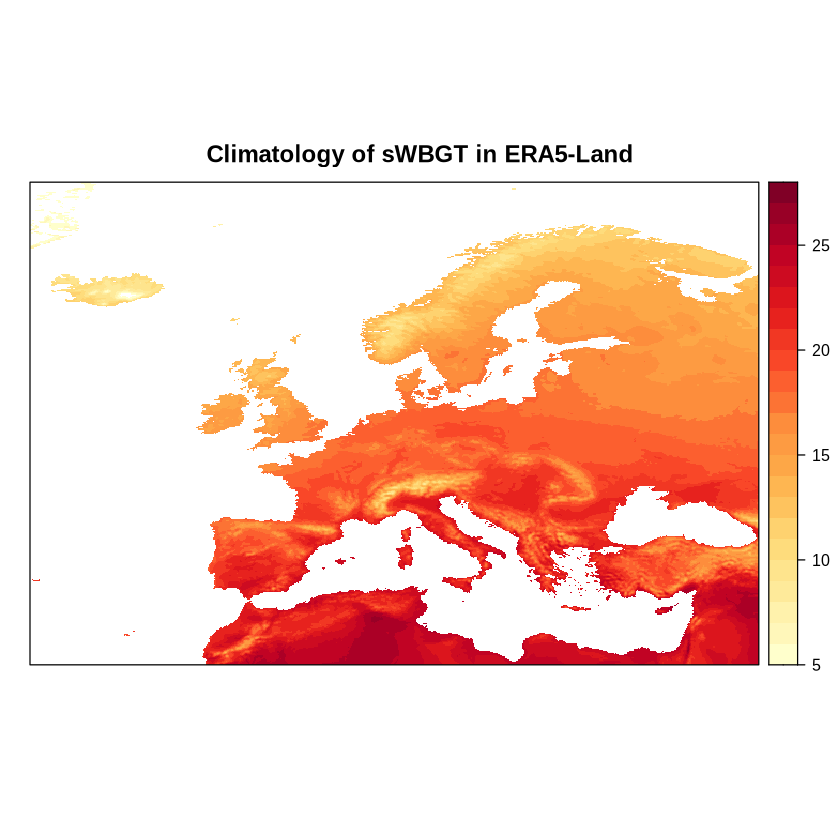

In [5]:
spatialPlot(era5_clim, main = "Climatology of sWBGT in ERA5-Land", at= seq(5,28, by=1), color.theme = "YlOrRd")

### Spatial subsetting

It is usefull to perform temporal or spatial subsetting to evaluate temporal characteristics of specific regions, for instance, the Iberian Peninsula:

In [6]:
era5_wbgt_iberia <- subsetGrid(era5_wbgt, lonLim = c(-10,5), latLim = c(35,45))
era5_wbgt <- NULL

[2026-01-26 11:33:02.565505] - Computing climatology...

[2026-01-26 11:33:02.889201] - Done.



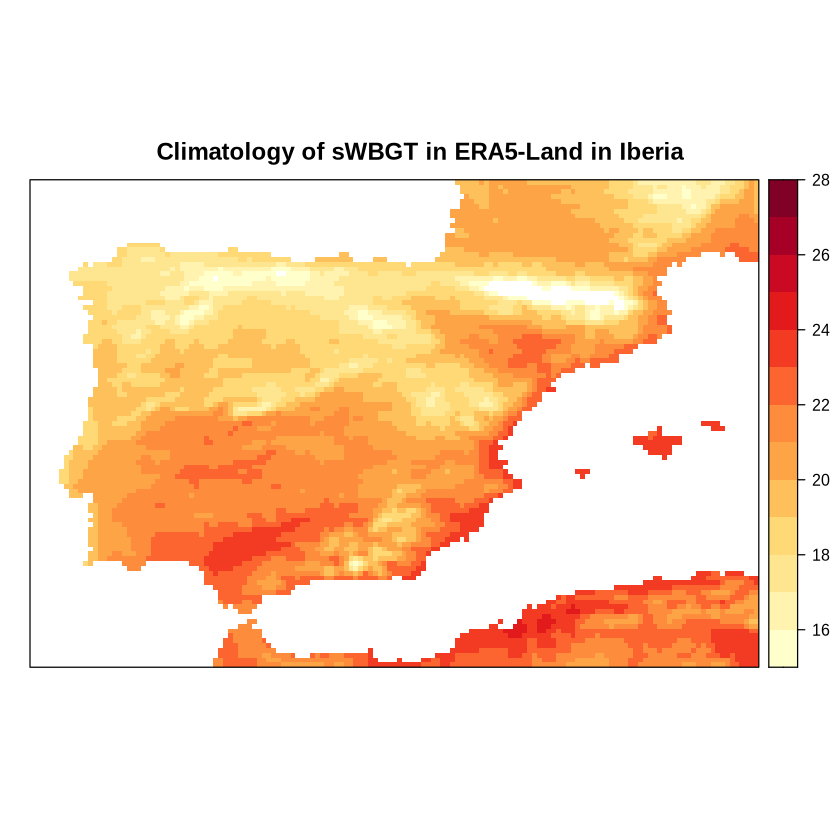

In [7]:
spatialPlot(climatology(era5_wbgt_iberia), main = "Climatology of sWBGT in ERA5-Land in Iberia", at= seq(15,28, by=1), color.theme = "YlOrRd")

## RCM data <a class="anchor" id="rcm-data"></a>

An example to retrieve data for one model together with the calculation of the heat stress index is shown in `3_HeatStress_example.ipynb`. Here we directly load the resulting netcdf file.

In [ ]:
rcm_wbgt_file <- "/mnt/CORDEX_CMIP6_tmp/user_tmp/acasanueva/tests/wbgt_CCLM6-0-1-URB_2018-2020.nc4"

In [9]:
rcm_wbgt <- loadGridData(rcm_wbgt_file, var = "swbgt")

[2026-01-26 11:33:07.836495] Defining geo-location parameters

[2026-01-26 11:33:07.924194] Defining time selection parameters

[2026-01-26 11:33:07.945836] Retrieving data subset ...

[2026-01-26 11:33:44.028319] Done



In [10]:
rcm_clim <- climatology(rcm_wbgt)


[2026-01-26 11:33:55.38956] - Computing climatology...

[2026-01-26 11:33:58.862695] - Done.



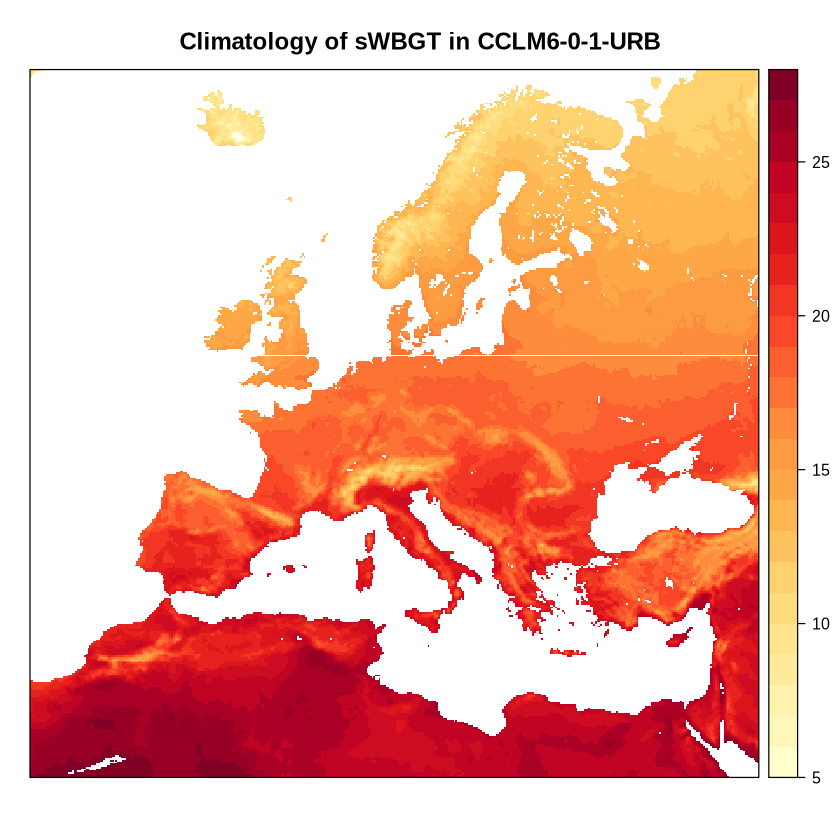

In [11]:
spatialPlot(rcm_clim, main = "Climatology of sWBGT in CCLM6-0-1-URB", at= seq(5,28, by=1), color.theme = "YlOrRd")


### Spatial interpolation

He we interpolate the RCM data to the ERA5-Land grid with `interpGrid`. By default, the nearest neighbour interpolation is used. This is needed prior to the bias calculation:

In [12]:
rcm_clim_interp <- interpGrid(rcm_clim, new.coordinates = getGrid(era5_clim))

Warning message in interpGrid(rcm_clim, new.coordinates = getGrid(era5_clim)):
“The new latitudes are outside the data extent”
[2026-01-26 09:17:13.410512] Calculating nearest neighbors...

[2026-01-26 09:27:11.79739] Performing nearest interpolation... may take a while

[2026-01-26 09:27:12.229353] Done



### Spatial subsetting and interpolation


In [11]:
rcm_wbgt_iberia <- subsetGrid(rcm_wbgt, lonLim = c(-22,-10.5), latLim = c(-13,-3.5))


[2026-01-26 11:34:40.9372] - Computing climatology...

[2026-01-26 11:34:41.132075] - Done.



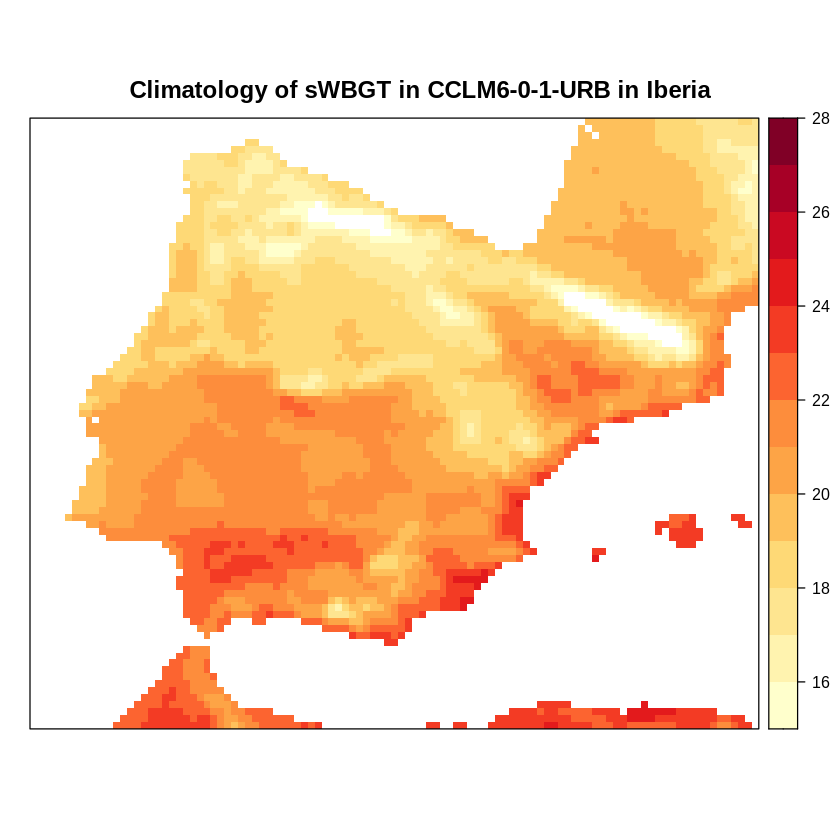

In [12]:
spatialPlot(climatology(rcm_wbgt_iberia), main = "Climatology of sWBGT in CCLM6-0-1-URB in Iberia", at= seq(15,28, by=1), color.theme = "YlOrRd")


However, we need to interpolate the RCM data to the ERA5-Land grid for the sake of comparison:

In [17]:
rcm_wbgt_iberia_interp <- interpGrid(rcm_wbgt, new.coordinates = getGrid(era5_wbgt_iberia))

[2026-01-26 11:40:28.225177] Calculating nearest neighbors...

[2026-01-26 11:40:58.687043] Performing nearest interpolation... may take a while

[2026-01-26 11:40:59.475872] Done



[2026-01-26 11:41:36.683729] - Computing climatology...

[2026-01-26 11:41:36.941439] - Done.



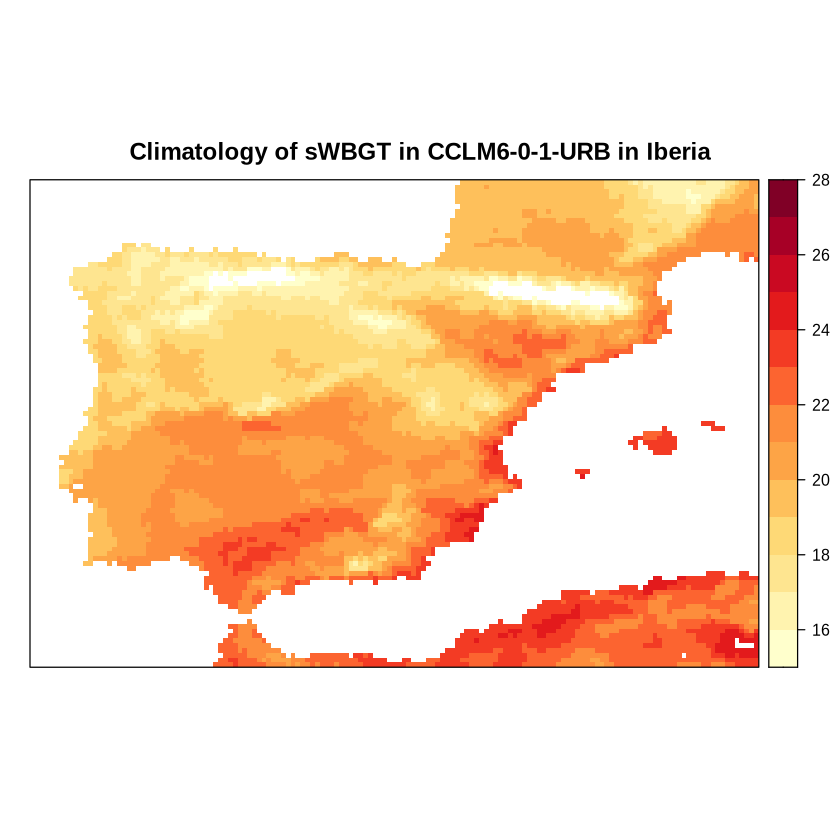

In [ ]:
spatialPlot(climatology(rcm_wbgt_iberia_interp), main = "Climatology of sWBGT in CCLM6-0-1-URB in Iberia", at= seq(15,28, by=1), color.theme = "YlOrRd")
rcm_wbgt <- NULL

## Bias with respect to ERA5-Land <a class="anchor" id="bias-with-respect-to-era5-land"></a>

Model biases are computed relative to ERA5-Land using the `gridArithmetics` function from the `transformeR` package. Since arithmetic operations require datasets with identical spatial grids, RCM data interpolated onto the ERA5-Land grid is required.

The bias is defined as the difference between the interpolated model climatology and the ERA5-Land climatology. The resulting bias field is visualized using `spatialPlot` with a diverging color palette, highlighting regions with negative and positive deviations.

In [ ]:
bias <- gridArithmetics(rcm_clim_interp, era5_clim, operator = "-")

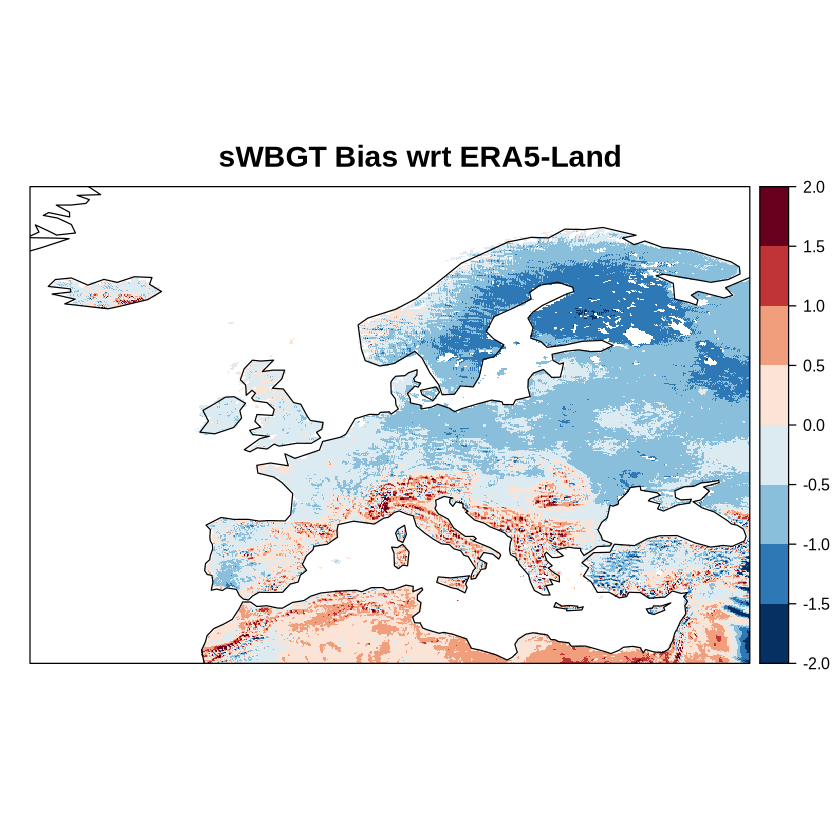

In [ ]:
spatialPlot(bias, rev.colors = TRUE, at=seq(-2,2,0.5), set.min = -2, set.max = 2, 
                       color.theme = "RdBu", main=list(label = "sWBGT Bias wrt ERA5-Land", cex =1.5), backdrop.theme = "coastline")

## Daily cycle <a class="anchor" id="daily-cycle"></a>

Before we extracted data for the Iberian Peninsula. Here we perform a spatial aggregation (average) over Iberia of the hourly time series to evaluate differences in the daily cycle. Note that this aggregation may be mixing places with different characteristics, here it is done for illustrative purposes only. 

In [20]:
era5_iberia_agg <- aggregateGrid(era5_wbgt_iberia, aggr.spatial = list(FUN = "mean", na.rm = TRUE))
rcm_iberia_agg <- aggregateGrid(rcm_wbgt_iberia_interp, aggr.spatial = list(FUN = "mean", na.rm = TRUE))

Calculating areal weights...

[2026-01-26 11:43:42.590442] - Aggregating spatially...

[2026-01-26 11:43:43.060001] - Done.

Calculating areal weights...

[2026-01-26 11:43:43.16352] - Aggregating spatially...

[2026-01-26 11:43:43.750028] - Done.



As a result, we have spatially averaged time series at hourly resolution. Next, we calculate the diurnal cycle by averaging timesteps corresponding to the same hour. 

In [23]:
hours_all <- format(as.POSIXct(getRefDates(era5_iberia_agg)), "%H:%M:%S")
hours <- unique(hours_all)
ls <-lapply(1:length(hours), function(h){
	idx <- which(hours_all %in% hours[h])
	data_sub <- subsetDimension(era5_iberia_agg, dimension = "time", indices = idx)
	data_sub_agg <- climatology(data_sub)
	return(data_sub_agg)
})	
era5_day_cycle <-  bindGrid(ls, dimension = "time")

[2026-01-26 11:46:23.613318] - Computing climatology...

[2026-01-26 11:46:23.614455] - Done.

[2026-01-26 11:46:23.618548] - Computing climatology...

[2026-01-26 11:46:23.619564] - Done.

[2026-01-26 11:46:23.621955] - Computing climatology...

[2026-01-26 11:46:23.622938] - Done.

[2026-01-26 11:46:23.624977] - Computing climatology...

[2026-01-26 11:46:23.625792] - Done.

[2026-01-26 11:46:23.627663] - Computing climatology...

[2026-01-26 11:46:23.628514] - Done.

[2026-01-26 11:46:23.630618] - Computing climatology...

[2026-01-26 11:46:23.631602] - Done.

[2026-01-26 11:46:23.633817] - Computing climatology...

[2026-01-26 11:46:23.634914] - Done.

[2026-01-26 11:46:23.640625] - Computing climatology...

[2026-01-26 11:46:23.641508] - Done.

[2026-01-26 11:46:23.643521] - Computing climatology...

[2026-01-26 11:46:23.644434] - Done.

[2026-01-26 11:46:23.646531] - Computing climatology...

[2026-01-26 11:46:23.647562] - Done.

[2026-01-26 11:46:23.649862] - Computing climatolo

In [24]:
ls <-lapply(1:length(hours), function(h){
	idx <- which(hours_all %in% hours[h])
	data_sub <- subsetDimension(rcm_iberia_agg, dimension = "time", indices = idx)
	data_sub_agg <- climatology(data_sub)
	return(data_sub_agg)
})	
rcm_day_cycle <-  bindGrid(ls, dimension = "time")

[2026-01-26 11:46:27.155844] - Computing climatology...

[2026-01-26 11:46:27.158112] - Done.

[2026-01-26 11:46:27.165153] - Computing climatology...

[2026-01-26 11:46:27.166363] - Done.

[2026-01-26 11:46:27.168569] - Computing climatology...

[2026-01-26 11:46:27.169429] - Done.

[2026-01-26 11:46:27.171445] - Computing climatology...

[2026-01-26 11:46:27.172463] - Done.

[2026-01-26 11:46:27.176428] - Computing climatology...

[2026-01-26 11:46:27.177629] - Done.

[2026-01-26 11:46:27.180278] - Computing climatology...

[2026-01-26 11:46:27.181293] - Done.

[2026-01-26 11:46:27.183587] - Computing climatology...

[2026-01-26 11:46:27.184457] - Done.

[2026-01-26 11:46:27.186476] - Computing climatology...

[2026-01-26 11:46:27.187352] - Done.

[2026-01-26 11:46:27.189543] - Computing climatology...

[2026-01-26 11:46:27.190832] - Done.

[2026-01-26 11:46:27.193298] - Computing climatology...

[2026-01-26 11:46:27.194238] - Done.

[2026-01-26 11:46:27.196297] - Computing climatolo

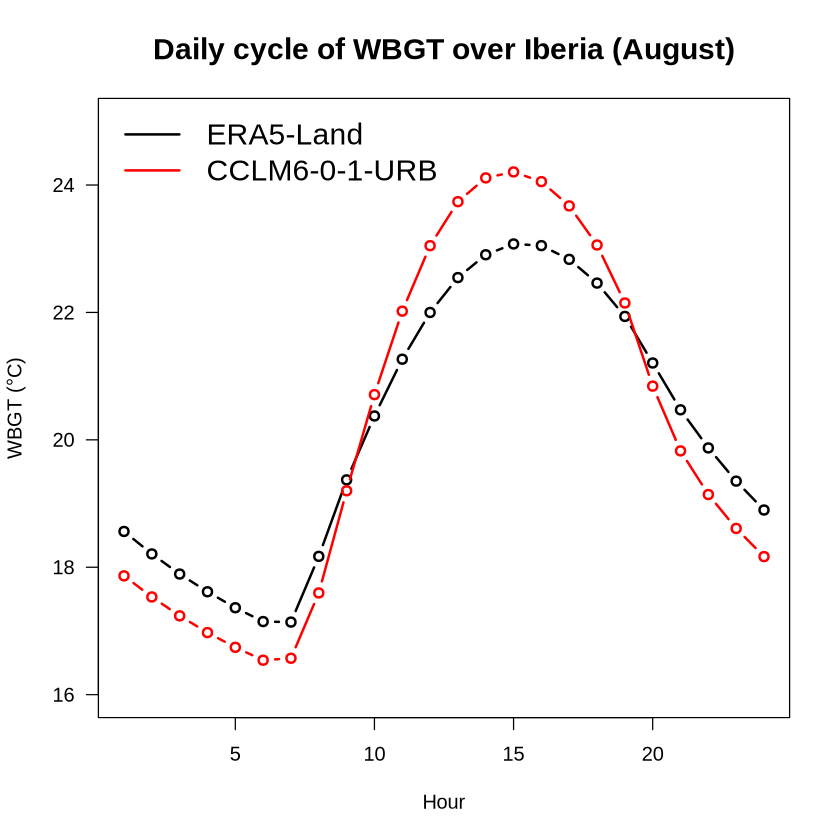

In [ ]:
plot(era5_day_cycle$Data, type="b", col="black",xlab="Hour", ylab="WBGT (°C)", main="Daily cycle of WBGT over Iberia (August)", ylim = c(16,25), lwd=2, las=1, cex.main=1.5)
lines(rcm_day_cycle$Data, type="b", col="red", lwd=2)
legend("topleft", legend=c("ERA5-Land", "CCLM6-0-1-URB"), col=c("black", "red"), lty=1, lwd=2,  bty = "n", cex = 1.5)

## Session Information <a class="anchor" id="session-information"></a>

For reproducibility and transparency, the notebook concludes by reporting the full R session information, including package versions and system details used to generate the results.

In [48]:
print(sessionInfo())

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 24.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/ana/micromamba/envs/R4.3/lib/libopenblasp-r0.3.30.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

time zone: Europe/Madrid
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-3  gridExtra_2.3       convertR_0.2.1     
 [4] udunits2_0.13.2.2   visualizeR_1.6.4    transformeR_2.2.2  
 [7] loadeR_1.8.4        climate4R.UDG_0.2.6 loadeR.java_1.2.1 